<a href="https://colab.research.google.com/github/rajilsaj/FICOchallenge/blob/main/notebooks/Week_6_LLM_Classifier_performance_metric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FICO Educational Analytics Challenge © Fair Isaac 2025**

Copyright 2025 FICO licensed under CC BY-NC-SA 4.0. To view a copy of this license, visit https://creativecommons.org/licenses/by-nc-sa/4.0/

# 📊 Week 6: LLM Model Evaluation and Performance Analysis

<div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px; margin: 15px 0; border-left: 5px solid #17a2b8;">

This notebook demonstrates how to load a previously fine-tuned Large Language Model (LLM) classifier and evaluate its performance on test data.

</div>

---

## 📋 Overview

<div style="background-color: #e8f4fd; padding: 15px; border-radius: 10px; margin: 15px 0;">

In our previous notebook, we fine-tuned a **<font color="DeepSkyBlue">BERT base model (uncased)</font>** and **<font color="Plum">Qwen base model</font>** on labeled synthetic conversations between a bank chatbot and its customers to classify conversations by intent.

**<font color="MediumSpringGreen">Now, we will:</font>**

1. **🔄 Load the saved fine-tuned model** and tokenizer from disk
2. **📊 Apply the model to test data** to generate predictions  
3. **📈 Calculate comprehensive performance metrics** including <font color="DeepSkyBlue">precision</font>, <font color="Plum">recall</font>, <font color="MediumSpringGreen">F1-scores</font>, and accuracy
4. **📋 Visualize results** through confusion matrices and performance reports

</div>

---

## 🎯 What This Notebook Covers

<div style="background-color: #f9fbe7; padding: 15px; border-radius: 10px; margin: 15px 0;">

- 🔄 **<font color="Turquoise">Loading pre-trained models</font>** and tokenizers from local storage
- 📊 **<font color="lightgreen">Generating predictions</font>** on unseen test data
- 📈 **<font color="DeepSkyBlue">Computing detailed performance metrics</font>** for classification tasks
- 🎯 **<font color="Plum">Understanding model strengths and weaknesses</font>** through various evaluation approaches
- 📋 **<font color="MediumSpringGreen">Creating comprehensive evaluation reports</font>** with visualizations

</div>

---

## 🤖 Model Details

<div style="background-color: #fff8e1; padding: 15px; border-radius: 10px; margin: 15px 0; border: 2px solid #FF9800;">

- **Base Model**: <font color="DeepSkyBlue">BERT base model (uncased)</font> or <font color="Plum">Qwen</font>
- **Task**: <font color="MediumSpringGreen">Multi-class intent classification</font> for banking conversations
- **Training Data**: Synthetic conversations between bank chatbot and customers
- **Model Version**: <font color="Turquoise">v1_2epoch</font> (update to your version's name)

</div>

<div style="background-color: #e8f5e8; padding: 15px; border-radius: 10px; margin: 15px 0; border-left: 5px solid #4CAF50;">

**<font color="MediumSpringGreen">🎯 Goal:</font>** This evaluation will help us understand how well our fine-tuned model generalizes to new, unseen conversations and whether it's ready for deployment in a production environment.

</div>

### Expected File Structure

This notebook expects you to have the following file structure inside of **MyDrive**:

```
MyDrive
    └── FICO Analytic Challenge
        └── Data
            └── conversations_train.csv
            └── conversations_validation.csv
            └── conversations_test.csv
        └── Model
```
All the model outputs will be saved in 'Model' folder

# 📊 Understanding Precision, Recall, and F1-Score

## What are these metrics?

**Precision, Recall, and F1-Score** are performance metrics used to evaluate classification models. **Accuracy** is another metric that is used in evaluation, which says how often the model makes correct predictions compared to total number of predictions. Unlike simple accuracy, **Precision, Recall, and F1-Score** metrics help us understand *how well* our model performs for each specific class.

---

## 🎯 Simple Definitions

<div style="background-color: #e8f4fd; padding: 15px; border-left: 5px solid #2196F3; margin: 10px 0;">
<strong>🎯 <font color="DeepSkyBlue">Precision</font></strong>: "Of all the predictions I made for this class, how many were actually correct?"
</div>

<div style="background-color: #f3e5f5; padding: 15px; border-left: 5px solid #9C27B0; margin: 10px 0;">
<strong>🔍 <font color="Plum">Recall</font></strong>: "Of all the actual instances of this class, how many did I correctly identify?"
</div>

<div style="background-color: #e8f5e8; padding: 15px; border-left: 5px solid #4CAF50; margin: 10px 0;">
<strong>⚖️ <font color="MediumSpringGreen">F1-Score</font></strong>: "What's the balanced average between precision and recall?"
</div>

---

## 🏥 Medical Diagnosis Example

Let's use a COVID-19 test as an example:

|                    | **Actually Has COVID** 🦠 | **Actually Healthy** ✅ |
|-------------------|------------------------|---------------------|
| **Test Says COVID** 🔴   | <span style="color: #4CAF50; font-weight: bold;">85 (True Positive)</span>     | <span style="color: #F44336; font-weight: bold;">10 (False Positive)</span>  |
| **Test Says Healthy** ⚪ | <span style="color: #FF9800; font-weight: bold;">15 (False Negative)</span>    | <span style="color: #4CAF50; font-weight: bold;">890 (True Negative)</span>  |

<div style="background-color: #e3f2fd; padding: 10px; border-radius: 5px; margin: 10px 0;">
<strong>🎯 <font color="DeepSkyBlue">Precision</font></strong> = <span style="color: lightgreen;">True Positives</span> / (<span style="color: lightgreen;">True Positives</span> + <span style="color: #F44336;">False Positives</span>) = <span style="color: lightgreen;">85</span> / (<span style="color: lightgreen;">85</span> + <span style="color: #F44336;">10</span>) = 85/95 = <strong><font color="DeepSkyBlue">0.89 (89%)</font></strong>

<br><em>Interpretation</em>: Of all people the test identified as having COVID, <strong><font color="DeepSkyBlue">89%</font></strong> actually had it.
</div>

<div style="background-color: #f3e5f5; padding: 10px; border-radius: 5px; margin: 10px 0;">
<strong>🔍 <font color="Plum">Recall</font></strong> = <span style="color: lightgreen;">True Positives</span> / (<span style="color: lightgreen;">True Positives</span> + <span style="color: #FF9800;">False Negatives</span>) = <span style="color: lightgreen;">85</span> / (<span style="color: lightgreen;">85</span> + <span style="color: #FF9800;">15</span>) = 85/100 = <strong><font color="Plum">0.85 (85%)</font></strong>

<br><em>Interpretation</em>: Of all people who actually had COVID, the test correctly identified <strong><font color="Plum">85%</font></strong> of them.
</div>

<div style="background-color: #e8f5e8; padding: 10px; border-radius: 5px; margin: 10px 0;">
<strong>⚖️ <font color="MediumSpringGreen">F1-Score</font></strong> = 2 × (<font color="DeepSkyBlue">Precision</font> × <font color="Plum">Recall</font>) / (<font color="DeepSkyBlue">Precision</font> + <font color="Plum">Recall</font>) = 2 × (<font color="DeepSkyBlue">0.89</font> × <font color="Plum">0.85</font>) / (<font color="DeepSkyBlue">0.89</font> + <font color="Plum">0.85</font>) = <strong><font color="MediumSpringGreen">0.87 (87%)</font></strong>

<br><em>Interpretation</em>: The balanced performance between precision and recall is <strong><font color="MediumSpringGreen">87%</font></strong>.
</div>

---

## 📈 When to prioritize each metric:

<div style="background-color: #fff3e0; padding: 15px; border-radius: 10px; margin: 15px 0; border: 2px solid #FF9800;">

### 🎯 <font color="DeepSkyBlue">High Precision is important when: False positives are costly</font>
- 📧 Email spam detection (don't want important emails marked as spam)
- 💊 Drug approval (don't want to approve unsafe drugs)  
- 💳 Credit card fraud detection (don't want to block legitimate transactions)
</div>

<div style="background-color: #f3e5f5; padding: 15px; border-radius: 10px; margin: 15px 0; border: 2px solid #9C27B0;">

### 🔍 <font color="Plum">High Recall is important when: False negatives are costly</font>
- 🏥 Medical screening (don't want to miss diseases)
- 🛡️ Security threat detection (don't want to miss actual threats)
- 🏭 Quality control in manufacturing (don't want to miss defective products)
</div>

<div style="background-color: #e8f5e8; padding: 15px; border-radius: 10px; margin: 15px 0; border: 2px solid #4CAF50;">

### ⚖️ <font color="MediumSpringGreen">F1-Score is useful when: You want balanced performance or have imbalanced classes</font>
- 📊 General classification tasks
- 🤔 When you can't decide between precision and recall
- 📈 Comparing models with different precision-recall trade-offs
</div>

---

## 🎭 Visual Understanding

<div style="background-color: #fff8e1; padding: 15px; border-radius: 10px; margin: 15px 0;">

Think of it like a **🚁 search and rescue scenario**:
- **🎯 <font color="DeepSkyBlue">Precision</font>**: Of all the people you rescued, how many actually needed rescuing?
- **🔍 <font color="Plum">Recall</font>**: Of all the people who actually needed rescuing, how many did you find and rescue?
- **⚖️ <font color="MediumSpringGreen">F1-Score</font>**: Overall rescue performance considering both accuracy and completeness
</div>

### 📚 Another way to think about it:

<div style="background-color: #f9fbe7; padding: 10px; border-radius: 5px; margin: 10px 0;">

**Library Book Search**:
- **🎯 <font color="DeepSkyBlue">Precision</font>**: Of all the books you pulled from the shelf thinking they were about "Python programming", how many actually were?
- **🔍 <font color="Plum">Recall</font>**: Of all the Python programming books in the library, how many did you successfully find?
- **⚖️ <font color="MediumSpringGreen">F1-Score</font>**: Your overall effectiveness as a book finder
</div>

---

### 🏦 Or in terms of our model

<div style="background-color: #e1f5fe; padding: 10px; border-radius: 5px; margin: 10px 0;">

**Intent Classification**:
- **🎯 <font color="DeepSkyBlue">Precision</font>**: Of all conversations our model labeled as "Account Balance Inquiry", how many were actually about account balances?
- **🔍 <font color="Plum">Recall</font>**: Of all conversations that were truly about account balance inquiries, how many did our model correctly identify?
- **⚖️ <font color="MediumSpringGreen">F1-Score</font>**: Overall performance balancing both precision and recall
</div>

---

## 💡 Key Takeaways

<div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px; margin: 15px 0; border-left: 5px solid #6c757d;">

1. **Accuracy can be misleading** with imbalanced datasets
2. **🎯 <font color="DeepSkyBlue">Precision</font>** focuses on the quality of positive predictions
3. **🔍 <font color="Plum">Recall</font>** focuses on catching all actual positive cases  
4. **⚖️ <font color="MediumSpringGreen">F1-Score</font>** provides a single metric balancing both concerns
5. The choice of metric depends on your specific problem and the cost of different types of errors
</div>

<div style="background-color: #fff3cd; padding: 15px; border-radius: 8px; margin: 15px 0; border: 1px solid #ffeaa7;">
<strong>⚠️ Trade-off</strong>: There's usually a trade-off between precision and recall. Improving one often decreases the other, which is why F1-score (their harmonic mean) is valuable for overall assessment.
</div>

---

## 📋 Quick Reference Formulas

<div style="background-color: #f8f9fa; padding: 15px; border-radius: 10px; margin: 15px 0;">

| Metric | Formula | What it measures | Color Code |
|--------|---------|------------------|------------|
| **🎯 Precision** | TP / (TP + FP) | Quality of positive predictions | <font color="DeepSkyBlue"><strong>Deep Sky Blue</strong></font> |
| **🔍 Recall** | TP / (TP + FN) | Completeness of positive predictions | <font color="Plum"><strong>Plum</strong></font> |
| **⚖️ F1-Score** | 2 × (P × R) / (P + R) | Balanced measure of both | <font color="MediumSpringGreen"><strong>Medium Spring Green</strong></font> |

<em style="color: #6c757d;">Where: TP = True Positives, FP = False Positives, FN = False Negatives, P = Precision, R = Recall</em>

</div>

## Import Libraries and Set up Folder Paths

In [1]:
!pip install -q transformers datasets evaluate scikit-learn matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.2 MB/s eta 0:00:00


In [2]:
# Import Required Libraries
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification, pipeline
)
from peft import PeftModel

from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)

In [3]:
import os
import sys
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive/', force_remount=True)

# Base path for your project
path = '/content/drive/MyDrive/FICO Analytic Challenge/'

# Folder that's holding dataset
data = 'Data'

# Folder that stores the models
model = 'Model'

# Path to the "Data" and "Model" folder
data_path = os.path.join(path, data)
model_path = os.path.join(path, model)

# Create folders to log training steps
os.makedirs(os.path.join(model_path, 'results'), exist_ok=True)
os.makedirs(os.path.join(model_path, 'logs'), exist_ok=True)

Mounted at /content/drive/


In [4]:
# Set device
DEVICE_TYPE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {DEVICE_TYPE}")

Using device: cuda


## 📂 Input Data Processing

<div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px; margin: 15px 0; border-left: 5px solid #17a2b8;">

This section reads the test dataset for model evaluation

<div style="background-color: #fff3cd; padding: 15px; border-radius: 8px; margin: 15px 0; border: 2px solid #ffc107;">

**📋 <font color="Turquoise">Action Required:</font>**

Please **<font color="DeepSkyBlue">update the following variable</font>** with your actual dataset file name:

- **`test_dataset_name`** → Your test dataset filename

<em><font color="Plum">Make sure the file name matches exactly</font></em> with the datasets stored in your data directory.

</div>

In [5]:
# Names of the test dataset - update as needed
test_dataset_name = 'conversations_1.csv' # 'conversations_test.csv'

In [6]:
# Read the test dataset, print the shape and sample records
test_data_path = os.path.join(data_path, test_dataset_name)
df_test = pd.read_csv(test_data_path)
print(df_test.shape)
df_test.head()

(275, 5)


,intent,scenario,conversation_text,sentiment,user_speech_type
0,SPEAK_TO_AGENT,The bank has reached out to a customer about a...,"\n\nBot: Hello, this is a representative from ...",confused,typos
1,SPEAK_TO_AGENT,The bank has reached out to a customer about a...,"\n\nBot: Hello, this is a representative from ...",neutral,casual
2,SPEAK_TO_AGENT,The bank has reached out to a customer about a...,"\n\nBot: Hi, this is a representative from [Ba...",neutral,typos
3,SPEAK_TO_AGENT,The bank has reached out to a customer about a...,"\n\nBot: Hello, this is [Bank Name] calling ab...",confused,professional
4,SPEAK_TO_AGENT,The bank has reached out to a customer about a...,"\n\nBot: Hi there, this is a representative fr...",confused,casual


## Load Saved Model, Tokenizer, Config file and create Inference Pipeline

<div style="background-color: #fff3cd; padding: 15px; border-radius: 8px; margin: 15px 0; border: 2px solid #ffc107;">

**📝 <font color="Turquoise">Important Note:</font>**

Please **<font color="DeepSkyBlue">update the following variables</font>** to match your specific model details:

- **`model_name`**: Should match the base model you used for fine-tuning
- **`model_version`**: Should match the version name you used when saving your model

<em><font color="Plum">These must match exactly</font></em> with the folder names created during your model training and saving process.

</div>

In [7]:
# Define Model Configuration (same as your training notebook)
# Specify the pre-trained LLM model name and version
model_name = "bert-base-uncased"  # 'bert-base-uncased' or 'Qwen/Qwen1.5-4b'
model_version = "v1_2epoch"

# Create model results path (same as your training notebook)
model_results_path = os.path.join(model_path, model_name[model_name.find("/")+1:] + '_' + model_version)

print(f"Model path: {model_results_path}")

# Verify the model path exists
if not os.path.exists(model_results_path):
    raise FileNotFoundError(f"Model path {model_results_path} does not exist!")
else:
    print(f"Model directory found with files: {os.listdir(model_results_path)}")

Model path: /content/drive/MyDrive/FICO Analytic Challenge/Model/bert-base-uncased_v1_2epoch
Model directory found with files: ['config.json', 'model.safetensors', 'tokenizer_config.json', 'training_args.bin', 'tokenizer.json']


In [8]:
# Load model config file
model_config = json.load(open(f"{model_results_path}/config.json", "r"))

# Load label to id mapping from config file
label2id = model_config["label2id"]
print(label2id)
id2label = {v: k for k, v in label2id.items()}
print(id2label)

{'CREDIT_SCORE_QUERY': 0, 'FALLBACK': 1, 'PAY_NOW': 2, 'REQUEST_EXTENSION': 3, 'REQUEST_PAYMENT_PLAN': 4, 'SCHEDULE_PAYMENT': 5, 'SEND_STATEMENT_COPY': 6, 'SETUP_AUTOPAY': 7, 'SPEAK_TO_AGENT': 8}
{0: 'CREDIT_SCORE_QUERY', 1: 'FALLBACK', 2: 'PAY_NOW', 3: 'REQUEST_EXTENSION', 4: 'REQUEST_PAYMENT_PLAN', 5: 'SCHEDULE_PAYMENT', 6: 'SEND_STATEMENT_COPY', 7: 'SETUP_AUTOPAY', 8: 'SPEAK_TO_AGENT'}


In [9]:
# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_results_path)

In [10]:
# Load the fine-tuned model
if model_name == "bert-base-uncased":
    # Load model
    model = AutoModelForSequenceClassification.from_pretrained(model_results_path, num_labels=len(label2id))
    # Evaluation mode
    model.eval()

    print("✓ Model loaded successfully!")

elif model_name.startswith("Qwen"):
    # Load base model
    base_model = AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=len(label2id),
        id2label = id2label,
        label2id = label2id
    )

    # Load LoRA adapter
    model = PeftModel.from_pretrained(base_model, model_results_path)

    # Merge LoRA into base weights
    model = model.merge_and_unload()

    print("✓ Model loaded successfully!")
else:
    raise ValueError(f"Model load not successful")

Loading weights:   0%|          | 0/201 [00:00<?, ?it/s]

✓ Model loaded successfully!


In [11]:
# Create inference pipeline
clf_pipeline = pipeline(
    "text-classification",
    model=model,
    tokenizer=tokenizer,
    truncation=True,
    device=0 if torch.cuda.is_available() else -1
)

## 🧪 Evaluate the Fine-Tuned Model on Test Data

<div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px; margin: 15px 0; border-left: 5px solid #28a745;">

**<font color="MediumSpringGreen">Why Test Data Evaluation?</font>**

Evaluation on a test dataset is crucial to measure how well your model performs on data it hasn't seen during training. This helps us understand if our model can **<font color="DeepSkyBlue">generalize</font>** to real-world scenarios.

</div>

<div style="background-color: #e8f4fd; padding: 15px; border-radius: 10px; margin: 15px 0;">

**<font color="Turquoise">What we're doing:</font>** The following code evaluates the performance of our fine-tuned model on the test dataset, providing us with key metrics like:

- **<font color="DeepSkyBlue">Precision</font>**: Quality of positive predictions
- **<font color="Plum">Recall</font>**: Completeness of positive predictions  
- **<font color="MediumSpringGreen">F1-Score</font>**: Balanced measure of both
- **Accuracy**: Overall correctness across all classes

</div>

<div style="background-color: #fff3cd; padding: 10px; border-radius: 5px; margin: 10px 0; border: 1px solid #ffeaa7;">

💡 **<font color="lightgreen">Remember:</font>** Test data should only be used once for final evaluation to get an unbiased estimate of model performance!

</div>

### Get Predictions on the Test data

In [12]:
# Run inference and generate predictions on test data
predictions = clf_pipeline(df_test["conversation_text"].tolist())

In [13]:
# Displaying 10 predictions
predictions[0:10]

[{'label': 'FALLBACK', 'score': 0.13994921743869781},
 {'label': 'REQUEST_EXTENSION', 'score': 0.1464965045452118},
 {'label': 'REQUEST_EXTENSION', 'score': 0.13074272871017456},
 {'label': 'REQUEST_EXTENSION', 'score': 0.14808408915996552},
 {'label': 'REQUEST_EXTENSION', 'score': 0.16138163208961487},
 {'label': 'SPEAK_TO_AGENT', 'score': 0.140782430768013},
 {'label': 'REQUEST_EXTENSION', 'score': 0.15085601806640625},
 {'label': 'FALLBACK', 'score': 0.13661690056324005},
 {'label': 'SPEAK_TO_AGENT', 'score': 0.16432103514671326},
 {'label': 'SEND_STATEMENT_COPY', 'score': 0.13955113291740417}]

In [15]:
# Extract predicted labels, probabilities and true labels
y_pred = [pred["label"] for pred in predictions]
y_prob = [pred["score"] for pred in predictions]
y_true = df_test["intent"].tolist()

# Save predictions back to dataframe
df_test["predicted_label"] = y_pred
df_test["predicted_probability"] = [pred["score"] for pred in predictions]

## 📊 Calculate Comprehensive Performance Metrics

<div style="background-color: #e8f4fd; padding: 15px; border-radius: 10px; margin: 15px 0;">

This function calculates and displays detailed performance metrics for our classification model:

**📈 What it calculates:**
- **Overall accuracy** and <font color="DeepSkyBlue">macro</font>/<font color="Plum">weighted averages</font> for all metrics
- **Per-class <font color="DeepSkyBlue">precision</font>, <font color="Plum">recall</font>, and <font color="MediumSpringGreen">F1-scores</font>** for each intent category
- **Support values** (number of actual instances per class)

**📋 What it displays:**
- Summary table with overall model performance
- Detailed breakdown showing how well the model performs for each specific intent

</div>

In [16]:
# Calculate overall metrics

# accuracy metric
accuracy = accuracy_score(y_true, y_pred)

# Macro and weighted averages
precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(
    y_true, y_pred, average='macro', zero_division=0
)
precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(
    y_true, y_pred, average='weighted', zero_division=0
)

# Print overall metrics
print("\n" + "="*60)
print(f"Model: {model_name}_{model_version}")
print(f"Test Dataset Size: {df_test.shape[0]}")
print(f"Number of Classes: {len(set(y_true))}")
print(f"Device Used: {DEVICE_TYPE}")
print("\n" + "="*60)
print("OVERALL PERFORMANCE METRICS")
print("="*60)
print(f"Overall Accuracy:           {accuracy:.4f}")
print(f"Macro Precision:            {precision_macro:.4f}")
print(f"Macro Recall:               {recall_macro:.4f}")
print(f"Macro F1-Score:             {f1_macro:.4f}")
print(f"Weighted Precision:         {precision_weighted:.4f}")
print(f"Weighted Recall:            {recall_weighted:.4f}")
print(f"Weighted F1-Score:          {f1_weighted:.4f}")


Model: bert-base-uncased_v1_2epoch
Test Dataset Size: 275
Number of Classes: 9
Device Used: cuda

OVERALL PERFORMANCE METRICS
Overall Accuracy:           0.2327
Macro Precision:            0.1982
Macro Recall:               0.2394
Macro F1-Score:             0.1691
Weighted Precision:         0.2171
Weighted Recall:            0.2327
Weighted F1-Score:          0.1713


## Classification Report

In [17]:
# Classification Report
print("\n" + "="*60)
print("DETAILED CLASSIFICATION REPORT")
print("="*60)
print(classification_report(y_true, y_pred, digits=4))


DETAILED CLASSIFICATION REPORT
                      precision    recall  f1-score   support

  CREDIT_SCORE_QUERY     0.8462    0.2750    0.4151        40
            FALLBACK     0.2414    0.2800    0.2593        25
             PAY_NOW     0.0000    0.0000    0.0000        25
   REQUEST_EXTENSION     0.1734    1.0000    0.2956        30
REQUEST_PAYMENT_PLAN     0.0000    0.0000    0.0000        40
    SCHEDULE_PAYMENT     0.0000    0.0000    0.0000        35
 SEND_STATEMENT_COPY     0.4516    0.4667    0.4590        30
       SETUP_AUTOPAY     0.0000    0.0000    0.0000        35
      SPEAK_TO_AGENT     0.0714    0.1333    0.0930        15

            accuracy                         0.2327       275
           macro avg     0.1982    0.2394    0.1691       275
        weighted avg     0.2171    0.2327    0.1713       275



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Confusion Matrix Visualization

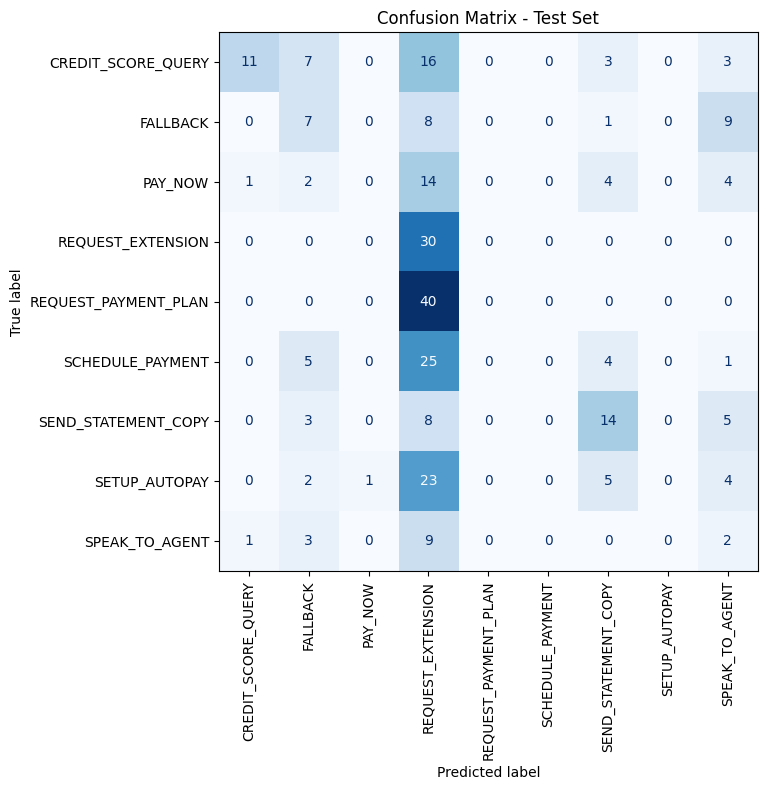


Confusion Matrix Shape: (9, 9)
Total Predictions: 275
Correct Predictions: 64
Accuracy from CM: 0.2327


In [18]:
# Confusion Matrix Visualization
# Create confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=sorted(list(set(y_true))))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(list(set(y_true))))

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(ax=ax, cmap="Blues", xticks_rotation=90, colorbar=False)
plt.title("Confusion Matrix - Test Set")
plt.tight_layout()
plt.show()

# Print confusion matrix statistics
print(f"\nConfusion Matrix Shape: {cm.shape}")
print(f"Total Predictions: {cm.sum()}")
print(f"Correct Predictions: {np.trace(cm)}")
print(f"Accuracy from CM: {np.trace(cm) / cm.sum():.4f}")

# 🤔 Interpreting Your Results: Key Questions to Consider

<div style="background-color: #f8f9fa; padding: 20px; border-radius: 10px; margin: 15px 0; border-left: 5px solid #6f42c1;">

Now that we have our model's performance metrics, let's **<font color="MediumSpringGreen">think critically</font>** about what these numbers tell us about our fine-tuned **<font color="DeepSkyBlue">BERT</font>** and **<font color="Plum">Qwen</font>** models for banking conversation classification.

**<font color="Turquoise">What we'll explore:</font>** Understanding the real-world implications of <font color="DeepSkyBlue">precision</font>, <font color="Plum">recall</font>, and <font color="MediumSpringGreen">F1-scores</font> in a business context.

</div>

## 📊 Overall Performance Analysis

### Question 1: How Good is Our Model Overall?

<div style="background-color: #f8f9fa; padding: 15px; border-radius: 10px; margin: 15px 0; border-left: 5px solid #17a2b8;">

- **Look at your overall accuracy**: Is it above 80%? 90%?
- **Compare <font color="MediumSpringGreen">F1-scores</font>**: Are they consistent across different intent categories?
- **Consider your use case**: For a banking chatbot, what level of accuracy would be acceptable?

<em><font color="Turquoise">Think about it</font></em>: A 95% accurate model sounds great, but what if it's terrible at identifying urgent issues like "fraud alerts"?

</div>

## 🎯 Class-Specific Performance

### Question 2: Which Intents Does Our Model Handle Best/Worst?

<div style="background-color: #e8f4fd; padding: 15px; border-radius: 10px; margin: 15px 0; border-left: 5px solid #2196F3;">

- **Examine per-class metrics**: Which intent categories have the highest <font color="DeepSkyBlue">precision</font>? Lowest <font color="Plum">recall</font>?
- **Look at your confusion matrix**: Are there patterns in misclassifications?
- **Consider business impact**: Are the poorly performing classes critical for customer experience?

<strong><font color="lightgreen">Example interpretation</font></strong>:
- High <font color="DeepSkyBlue">precision</font> for "Account Balance" (95%) = When the model says it's an account balance query, it's almost always right
- Low <font color="Plum">recall</font> for "Technical Support" (60%) = The model misses 40% of actual technical support requests

</div>

### Question 3: What Do the Precision-Recall Trade-offs Tell Us?

For each intent category, ask yourself:

<div style="background-color: #fff3e0; padding: 15px; border-radius: 10px; margin: 15px 0; border: 2px solid #FF9800;">

**<font color="DeepSkyBlue">High Precision</font>, <font color="Plum">Low Recall</font>** 📈📉
- *What this means*: Model is conservative - when it predicts this class, it's usually right, but it misses many actual cases
- *Example*: <font color="DeepSkyBlue">Precision=90%</font>, <font color="Plum">Recall=60%</font> for "Loan Application"
- *Implication*: Many loan inquiries might be misclassified as general questions
- *Business impact*: Potential customers don't get routed to loan specialists

</div>

<div style="background-color: #f3e5f5; padding: 15px; border-radius: 10px; margin: 15px 0; border: 2px solid #9C27B0;">

**<font color="DeepSkyBlue">Low Precision</font>, <font color="Plum">High Recall</font>** 📉📈
- *What this means*: Model is aggressive - it catches most cases but makes many false predictions
- *Example*: <font color="DeepSkyBlue">Precision=65%</font>, <font color="Plum">Recall=95%</font> for "Complaint"
- *Implication*: Many non-complaints get flagged as complaints
- *Business impact*: Customer service might waste time treating routine questions as complaints

</div>

<div style="background-color: #e8f5e8; padding: 15px; border-radius: 10px; margin: 15px 0; border: 2px solid #4CAF50;">

**<font color="MediumSpringGreen">Balanced Performance</font>** ⚖️
- *What this means*: Good <font color="MediumSpringGreen">F1-score</font> with similar <font color="DeepSkyBlue">precision</font> and <font color="Plum">recall</font>
- *Example*: <font color="DeepSkyBlue">Precision=85%</font>, <font color="Plum">Recall=87%</font>, <font color="MediumSpringGreen">F1=86%</font> for "Account Balance"
- *Implication*: Reliable performance for this intent type

</div>

## 🚨 Red Flags to Watch For

### Question 4: Are There Concerning Patterns?

<div style="background-color: #fff5f5; padding: 15px; border-radius: 10px; margin: 15px 0; border: 2px solid #F44336;">

**<font color="Turquoise">Look for these warning signs:</font>**

**1. Class Imbalance Issues**
- Are classes with fewer training examples performing poorly?
- Check if your <font color="MediumSpringGreen">F1-scores</font> correlate with class frequency

**2. Systematic Misclassifications**
- Does the confusion matrix show the model consistently confusing two specific classes?
- Are related intents (e.g., "Check Balance" vs "Account History") being mixed up?

**3. Critical Class Failures**
- Are high-priority intents (like "Fraud Alert" or "Account Locked") performing poorly?
- Even if overall accuracy is high, poor performance on critical classes is a serious issue

</div>

## 🔧 Improvement Strategies Based on Results

### Question 5: How Can We Improve Performance?

<div style="background-color: #f0f8ff; padding: 15px; border-radius: 10px; margin: 15px 0; border-left: 5px solid #4169E1;">

Based on your results, consider:

</div>

<div style="background-color: #e8f4fd; padding: 15px; border-radius: 10px; margin: 15px 0; border: 2px solid #2196F3;">

**If <font color="DeepSkyBlue">Precision</font> is Low:**
- Add more diverse negative examples during training
- Implement stricter classification thresholds
- Collect more high-quality training data for confused classes

</div>

<div style="background-color: #f3e5f5; padding: 15px; border-radius: 10px; margin: 15px 0; border: 2px solid #9C27B0;">

**If <font color="Plum">Recall</font> is Low:**
- Add more positive examples of missed cases
- Lower classification thresholds
- Augment training data for underrepresented classes

</div>

<div style="background-color: #fff5f5; padding: 15px; border-radius: 10px; margin: 15px 0; border: 2px solid #F44336;">

**If <font color="DeepSkyBlue">Both</font> <font color="Plum">Are Low</font>:**
- <font color="Turquoise">Fundamental model issues</font> - may need more training data, different architecture, or feature engineering

</div>

## 🎯 Business Context Questions

### Question 6: What Do These Metrics Mean for Real Users?

<div style="background-color: #fff8e1; padding: 15px; border-radius: 10px; margin: 15px 0; border-left: 5px solid #FF9800;">

**<font color="MediumSpringGreen">Customer Experience Impact:</font>**
- If <font color="DeepSkyBlue">precision</font> is low for "Urgent Issues": Customers with routine questions get escalated unnecessarily
- If <font color="Plum">recall</font> is low for "Technical Support": Customers with real technical problems don't get proper help  
- If "Account Security" has poor performance: Serious security concerns might be mishandled

</div>

<div style="background-color: #f0f8ff; padding: 15px; border-radius: 10px; margin: 15px 0; border-left: 5px solid #4169E1;">

**<font color="Turquoise">Operational Impact:</font>**
- High false positive rate = Wasted agent time
- High false negative rate = Unaddressed customer needs
- Inconsistent performance = Unpredictable user experience

</div>